In [2]:
import pandas as pd
import json
import numpy as np
import re
from nltk.stem.porter import *
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import model_selection,metrics,naive_bayes,preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import RandomOverSampler
stemmer = PorterStemmer()
import warnings
warnings.filterwarnings('ignore')

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [4]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9,min_df=5)
#tfidf_vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

X_train = pd.read_csv("Train_General.csv")

X_train_2 =X_train.sample(n = 2000)


x_train = X_train['Article']
y_train = X_train['Target']
x_train2 = X_train_2['Article']
y_train2 = X_train_2['Target']
#***************************************************************************
X_test  = pd.read_csv("Test_General.csv")
x_test  = X_test['Article']
y_test  = X_test['Target']
#**********************************************************************************

x_train  = tfidf_vectorizer.fit_transform(x_train.values.astype('U'))
x_test   = tfidf_vectorizer.transform(x_test.values.astype('U'))

x_train2  = tfidf_vectorizer.transform(x_train2.values.astype('U'))

x_train = pd.DataFrame(x_train.todense())
x_test  = pd.DataFrame(x_test.todense())
x_train2 = pd.DataFrame(x_train2.todense())




## Naive Bayes 


Metrics

 Recall metric: 0.8202231599352227
 F1 metric: 0.8201972472347965
 Precision metric: 0.8204431920198425
 Accuracy metric: 0.8202292378845767
 Balanced Accuracy metric: 0.8202231599352227 

**************************************************

Normalized confusion matrix
[[0.807 0.193]
 [0.167 0.833]]


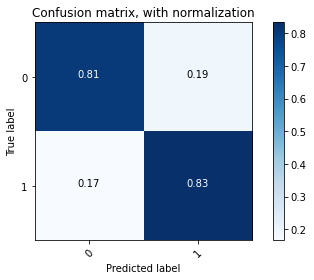

In [5]:
alpha = 0.2 # This is the smoothing parameter for Laplace/Lidstone smoothing
model = naive_bayes.MultinomialNB(alpha=alpha)

model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

print("\nMetrics\n")
recall = metrics.recall_score(y_test,y_predicted,average='macro')
precision = metrics.precision_score(y_test,y_predicted,average='macro')
f1 = metrics.f1_score(y_test,y_predicted,average='macro')
Accur=metrics.accuracy_score(y_test,y_predicted)
B_Accur=metrics.balanced_accuracy_score(y_test,y_predicted)

print(' Recall metric:',recall)
print(' F1 metric:',f1)
print(' Precision metric:',precision)
print(' Accuracy metric:',Accur)
print(' Balanced Accuracy metric:',B_Accur,"\n")
print("**************************************************\n")

cnf_matrix = confusion_matrix(y_test, y_predicted,labels=[0, 1])
np.set_printoptions(precision=3)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1],
                  title='Confusion matrix, with normalization')


## Random Forest

In [7]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

model2 = RandomForestClassifier(max_features="auto")

rf_random = RandomizedSearchCV(estimator = model2, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42,n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train2, y_train2)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 15.6min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [8]:
print(rf_random.best_params_)

{'n_estimators': 644, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 90, 'bootstrap': False}


In [10]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4,5,6],
    'n_estimators': [600, 650, 700]
}
# Create a based model
model2 = RandomForestClassifier(max_features="auto")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model2, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

grid_search.fit(x_train2, y_train2)
print(grid_search.best_params_)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 22.9min finished


{'bootstrap': False, 'max_depth': 90, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 600}



Metrics with OverSampling

 Recall metric: 0.8652604907385735
 F1 metric: 0.8651817538239728
 Precision metric: 0.8662283834526177
 Accuracy metric: 0.8652724713452644
 Balanced Accuracy metric: 0.8652604907385735 

**************************************************

Normalized confusion matrix
[[0.84  0.16 ]
 [0.109 0.891]]


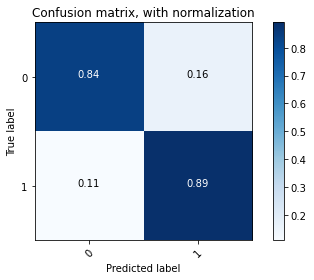

In [12]:
model2 = RandomForestClassifier(n_estimators=600, max_features="auto", bootstrap=False, 
                                max_depth =90, min_samples_leaf=2,min_samples_split = 6, n_jobs=-1)


model2.fit(x_train,y_train)
y_predicted = model2.predict(x_test)


print("\nMetrics with OverSampling\n")
recall = metrics.recall_score(y_test,y_predicted,average='macro')
precision = metrics.precision_score(y_test,y_predicted,average='macro')
f1 = metrics.f1_score(y_test,y_predicted,average='macro')
Accur=metrics.accuracy_score(y_test,y_predicted)
B_Accur=metrics.balanced_accuracy_score(y_test,y_predicted)

print(' Recall metric:',recall)
print(' F1 metric:',f1)
print(' Precision metric:',precision)
print(' Accuracy metric:',Accur)
print(' Balanced Accuracy metric:',B_Accur,"\n")
print("**************************************************\n")

cnf_matrix = confusion_matrix(y_test, y_predicted,labels=[0, 1])
np.set_printoptions(precision=3)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1],
                  title='Confusion matrix, with normalization')